In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [380]:
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [381]:
df.shape

(13320, 9)

In [382]:
for col in df.columns:
  print(df[col].value_counts())


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          

In [383]:
df.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [384]:
df.drop(columns=['area_type','society','balcony','availability'],inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [385]:
df['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [386]:
df['location']=df['location'].fillna('Whitefield')

In [387]:
df['size'].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [388]:
df['size'].isna().sum()

16

In [389]:
df['size']=df['size'].fillna('2 BHK')

In [390]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [391]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [392]:
df.drop(columns=['size'],inplace=True)

In [393]:
df['bath'].isna().sum()

73

In [394]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [395]:
df.shape

(13320, 5)

In [396]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [397]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [398]:
df[df.bhk>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [399]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [400]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return(float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [401]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [402]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [403]:
df['price_per_sqft']=(df['price']*100000)/df['total_sqft']

In [404]:
df['price_per_sqft'].describe()

,price_per_sqft
count,1.327400e+04
mean,7.907501e+03
std,1.064296e+05
min,2.678298e+02
25%,4.266865e+03
50%,5.434306e+03
75%,7.311746e+03
max,1.200000e+07


In [405]:
df.location.value_counts()

,count
location,
Whitefield,541
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [406]:
df.location = df.location.apply(lambda x: x.strip()) #removes extra spaces
location_count = df.location.value_counts()
location_count

,count
location,
Whitefield,542
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [407]:
location_count_less_than_10 = location_count[location_count<=10]

In [408]:
location_count_less_than_10

,count
location,
Dairy Circle,10
Nagappa Reddy Layout,10
Basapura,10
1st Block Koramangala,10
Sector 1 HSR Layout,10
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [409]:
df.location = df.location.apply(lambda x: 'other' if x in location_count_less_than_10 else x)

In [410]:
df.location.value_counts()

,count
location,
other,2885
Whitefield,542
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Nehru Nagar,11
Banjara Layout,11
LB Shastri Nagar,11


In [411]:
(df.total_sqft/df.bhk).describe()

,0
count,13274.000000
mean,575.074878
std,388.205175
min,0.250000
25%,473.333333
50%,552.500000
75%,625.000000
max,26136.000000


In [412]:
df = df[((df.total_sqft/df.bhk)>=300)]

In [413]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [414]:
df.shape

(12530, 6)

In [415]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))  & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)

In [416]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


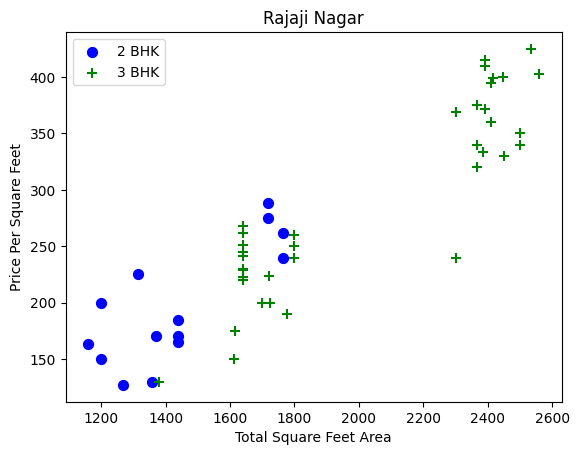

In [417]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]

    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,color='green',label='3 BHK',s=50,marker = '+')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df,"Rajaji Nagar")

In [418]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)

In [419]:
df.shape

(7361, 6)

In [420]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [421]:
df.drop(columns=['price_per_sqft'],inplace=True)

In [422]:
x=df.drop(columns=['price'])
y=df['price']

In [423]:
x

,location,total_sqft,bath,bhk
0,1st Block Jayanagar,2850.0,4.0,4
1,1st Block Jayanagar,1630.0,3.0,3
2,1st Block Jayanagar,1875.0,2.0,3
3,1st Block Jayanagar,1200.0,2.0,3
4,1st Block Jayanagar,1235.0,2.0,2
...,...,...,...,...
10292,other,1200.0,2.0,2
10293,other,1800.0,1.0,1
10296,other,1353.0,2.0,2
10297,other,812.0,1.0,1


In [424]:
y

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0
...,...
10292,70.0
10293,200.0
10296,110.0
10297,26.0


In [425]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [426]:
X_train.shape

(5888, 4)

In [427]:
X_test.shape

(1473, 4)

In [428]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [429]:
column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['location']),
    remainder='passthrough'
)


In [430]:
scaler=StandardScaler()

In [431]:
lr=LinearRegression()

In [432]:
pipe=make_pipeline(column_trans,scaler,lr)

In [433]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [434]:
y_pred_lr=pipe.predict(X_test)

In [435]:
r2_score(y_test,y_pred_lr)

0.7610093017455155

In [436]:
lasso=Lasso()

In [437]:
pipe=make_pipeline(column_trans,scaler,lasso)


In [438]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [439]:
y_pred_lasso=pipe.predict(X_test)

In [445]:
r2_score(y_test,y_pred_lasso)

0.7521566272252468

In [449]:
ridge=Ridge()
pipe=make_pipeline(column_trans,scaler,ridge)
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [450]:
y_pred_ridge=pipe.predict(X_test)

In [451]:
r2_score(y_test,y_pred_ridge)

0.7615845056268107

In [452]:
import pickle
pickle.dump(pipe,open('bangalore_home_prices_model.pickle','wb'))
